## k近傍法に関するテストコード

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# テストデータ
bc = pd.read_csv("../data/BigClass.csv")
print(bc.shape)
bc.head()

(40, 5)


,Name,Age,Sex,Height_inch,Weight_pound
0,KATIE,12,F,59,95
1,LOUISE,12,F,61,123
2,JANE,12,F,55,74
3,JACLYN,12,F,66,145
4,LILLIE,12,F,52,64


In [4]:
# 性別Mを1、Fを0とする
y = np.where(bc["Sex"]=="M",1,0)
y

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [6]:
X = bc[["Height_inch","Weight_pound"]]
X.head()

,Height_inch,Weight_pound
0,59,95
1,61,123
2,55,74
3,66,145
4,52,64


In [7]:
bc2 = bc.join(pd.DataFrame(y, columns=["y"]))
bc2.head()

,Name,Age,Sex,Height_inch,Weight_pound,y
0,KATIE,12,F,59,95,0
1,LOUISE,12,F,61,123,0
2,JANE,12,F,55,74,0
3,JACLYN,12,F,66,145,0
4,LILLIE,12,F,52,64,0


In [8]:
bc2["y"].value_counts()

1    22
0    18
Name: y, dtype: int64

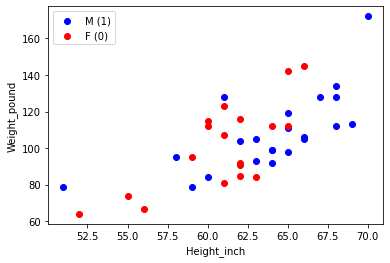

In [9]:
import matplotlib.pyplot as plt

# Male for Blue
plt.scatter(bc2.loc[bc2["Sex"]=="M","Height_inch"],bc2.loc[bc2["Sex"]=="M","Weight_pound"],color="blue",label="M (1)")
# Female for Red
plt.scatter(bc2.loc[bc2["Sex"]=="F","Height_inch"],bc2.loc[bc2["Sex"]=="F","Weight_pound"],color="red",label="F (0)")

plt.xlabel("Height_inch")
plt.ylabel("Weight_pound")

plt.legend()
plt.show()

n_neighbors(判定に使う近傍のデータ数) = 11

In [10]:
knn1 = KNeighborsClassifier(n_neighbors=11)
knn1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [11]:
knn1.fit(X,y)

KNeighborsClassifier(n_neighbors=11)

In [15]:
# 予測値の確認
# 1 ÷ n_neighbors の倍数となる
knn1.predict_proba(X)[:10,:]    # 上10行を表示

array([[0.36363636, 0.63636364],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.45454545, 0.54545455],
       [0.72727273, 0.27272727],
       [0.54545455, 0.45454545],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.54545455, 0.45454545],
       [0.45454545, 0.54545455]])

In [16]:
knn1.predict_proba(X).shape

(40, 2)

In [17]:
knn1.score(X, y)    # Accuracy

0.725

n_neighbors(判定に使う近傍のデータ数) = 3

In [18]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn2.predict_proba(X)[:10,:]    # 上10行を表示

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667]])

In [20]:
knn2.score(X,y)

0.775

スケーリングの実施
- Height_inchとWeight_poundにスケーリング（各変数を平均0,標準偏差1に正規化）を行う

In [21]:
scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X), columns=["Height_inch_s","Weight_pound_s"])
X_s.describe()

,Height_inch_s,Weight_pound_s
count,4.000000e+01,4.000000e+01
mean,6.217249e-16,-1.110223e-17
std,1.012739e+00,1.012739e+00
min,-2.757239e+00,-1.870217e+00
25%,-4.296995e-01,-6.043994e-01
50%,1.074249e-01,0.000000e+00
75%,5.848688e-01,4.675542e-01
max,1.778479e+00,3.056208e+00


n_neighbors(判定に使う近傍のデータ数) = 11
- スケーリングあり

In [22]:
knn_s1 = KNeighborsClassifier(n_neighbors=11)
knn_s1.fit(X_s,y)

KNeighborsClassifier(n_neighbors=11)

In [23]:
knn_s1.predict_proba(X_s)[:10,:]    # 上10行を表示

array([[0.63636364, 0.36363636],
       [0.63636364, 0.36363636],
       [0.63636364, 0.36363636],
       [0.36363636, 0.63636364],
       [0.63636364, 0.36363636],
       [0.54545455, 0.45454545],
       [0.63636364, 0.36363636],
       [0.63636364, 0.36363636],
       [0.63636364, 0.36363636],
       [0.81818182, 0.18181818]])

In [24]:
knn_s1.score(X_s,y)

0.675

n_neighbors(判定に使う近傍のデータ数) = 3
- スケーリングあり

In [25]:
knn_s2 = KNeighborsClassifier(n_neighbors=3)
knn_s2.fit(X_s,y)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_s2.predict_proba(X_s)[:10,:]    # 上10行を表示

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [27]:
knn_s2.score(X_s,y)

0.9

In [28]:
# すべての結果の比較

print( str(knn1.score(X,y)) + " : n_neighbors=11")
print( str(knn2.score(X,y)) + " : n_neighbors=3" )
print( str(knn_s1.score(X_s,y)) + " : n_neighbors=11 with scaling" )
print( str(knn_s2.score(X_s,y))  + " : n_neighbors=3 with scaling" )

0.725 : n_neighbors=11
0.775 : n_neighbors=3
0.675 : n_neighbors=11 with scaling
0.9 : n_neighbors=3 with scaling


プロットで確認
- スケーリングの有り無し
- n_neighbors（大きいとシンプル、小さいと複雑なモデル）

In [30]:
# Python機械学習プログラミング(p.30)

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s","x","o","^","v")
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
    x2_min, x2_max = X.iloc[:,1].min()-1, X.iloc[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X.iloc[y==cl,0], y=X.iloc[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

[Python機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-top-gear/dp/4844380605)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


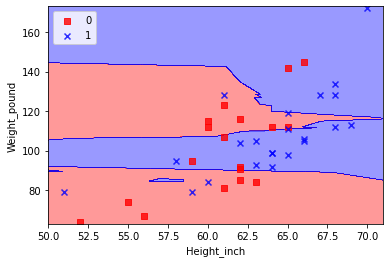

In [31]:
## Plot for knn1  -  n_neighbors=11
plot_decision_regions(X, y, knn1)
plt.legend(loc="upper left")
plt.xlabel("Height_inch")
plt.ylabel("Weight_pound")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


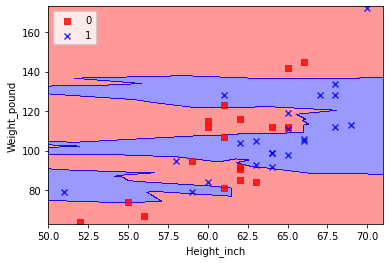

In [32]:
## Plot for knn2  -  n_neighbors=3
plot_decision_regions(X, y, knn2)
plt.legend(loc="upper left")
plt.xlabel("Height_inch")
plt.ylabel("Weight_pound")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


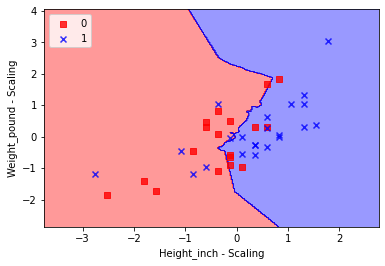

In [33]:
## Plot for knn_s1  -  n_neighbors=11 with scaling
plot_decision_regions(X_s, y, knn_s1)
plt.legend(loc="upper left")
plt.xlabel("Height_inch - Scaling")
plt.ylabel("Weight_pound - Scaling")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


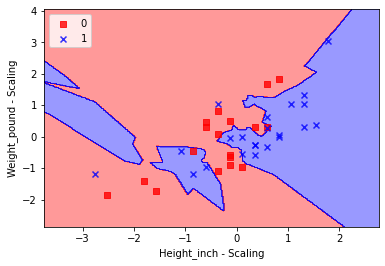

In [34]:
## Plot for knn_s2  -  n_neighbors=3 with scaling
plot_decision_regions(X_s, y, knn_s2)
plt.legend(loc="upper left")
plt.xlabel("Height_inch - Scaling")
plt.ylabel("Weight_pound - Scaling")
plt.show()